In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("covid.csv")

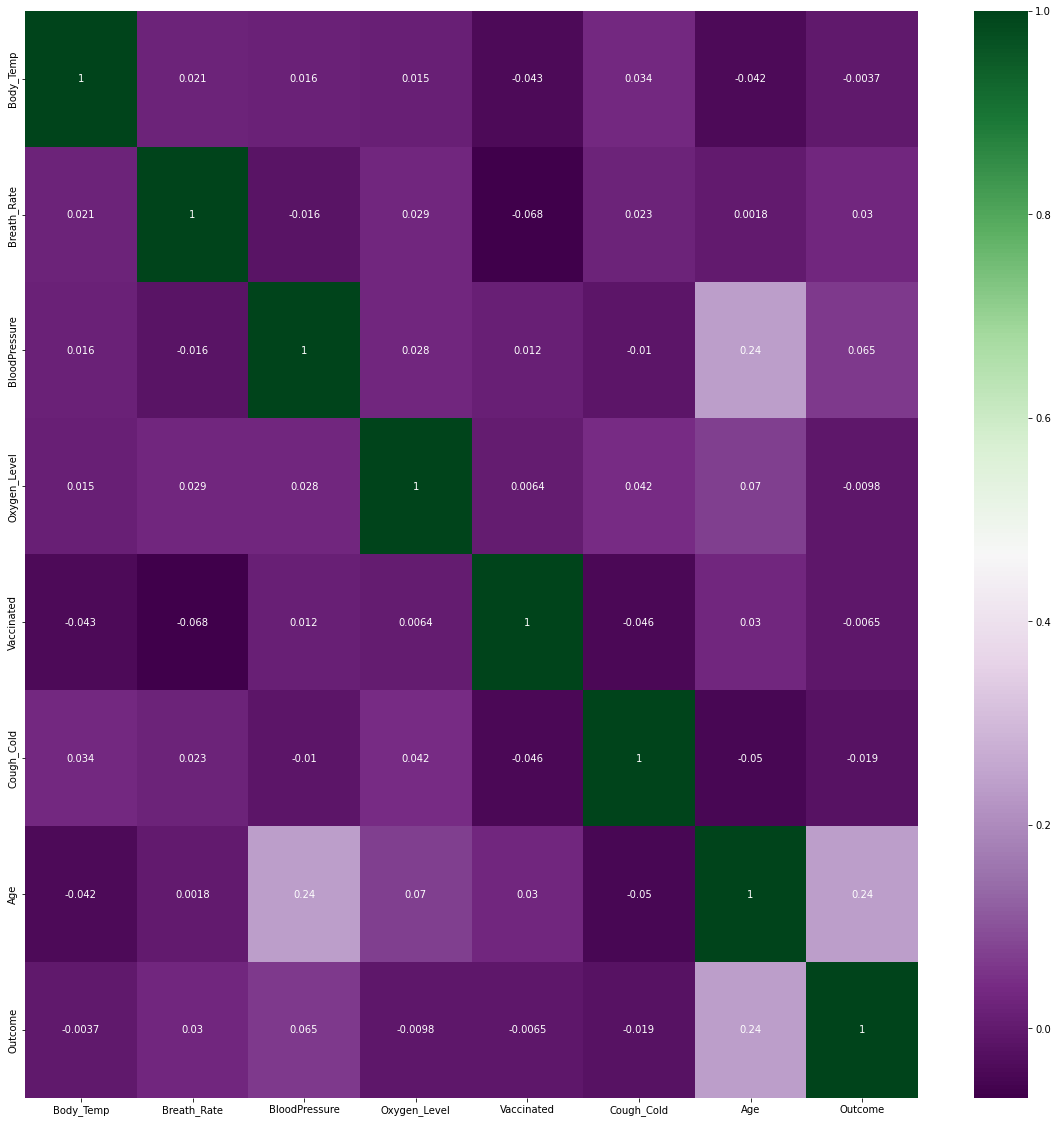

In [3]:
cormat = data.corr()
top_cor_features = cormat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_cor_features].corr(),annot=True,cmap="PRGn")

In [4]:
A= ['Body_Temp', 'Breath_Rate', 'BloodPressure','Oxygen_Level','Vaccinated','Cough_Cold','Age']
B= ['Outcome']

In [5]:
X = data[A].values
y = data[B].values

In [6]:
X_pred = [[101,18,85,91,1,0,24]]
X_pred = pd.DataFrame(X_pred, columns=['Body_Temp', 'Breath_Rate', 'BloodPressure','Oxygen_Level','Vaccinated','Cough_Cold','Age'])

In [7]:
model=RandomForestClassifier(n_estimators=100, n_jobs=-1)
model.fit(X,y)

prediction = model.predict(X_pred)
acc = metrics.accuracy_score(prediction,y[0])

C:\Users\priya\AppData\Local\Temp\ipykernel_13912\4293833933.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)
C:\Users\priya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [8]:
savename = "covidmodel.sav"
pickle.dump(model, open(savename, "wb"))

In [9]:
load_model = pickle.load(open(savename, "rb"))
single = load_model.predict(X_pred)[0]
probability = load_model.predict_proba(X_pred)[:,1][0]*100
if single==1:
        output = "The patient is having Covid 19 Positive symptoms. Make sure to Quarantine Yourself from other and Stay Safe ."
        output1 = "Model Accuracy: {}".format(probability)
else:
    output = "The patient is having Covid 19 Negative symptoms. Maintain Social Distancing and Stay Safe."
    output1 = ""

print(output)
print(output1)

The patient is having Covid 19 Positive symptoms. Make sure to Quarantine Yourself from other and Stay Safe .
Model Accuracy: 72.0


C:\Users\priya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\priya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
